# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
# Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

#### Informasi Dataset 
Dataset diperoleh dari kaggle, berikut adalah link dataset dari projek ini https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data. Berikut juga definisi dari masing-masing fitur pada dataset: 

- person_age: Usia dari pemohon pinjaman.
- person_gender: Jenis kelamin dari pemohon pinjaman.
- person_education: Tingkat pendidikan tertinggi yang telah diselesaikan oleh pemohon.
- person_income: Pendapatan tahunan dari pemohon pinjaman.
- person_emp_exp: Lama pengalaman kerja pemohon dalam satuan tahun.
- person_home_ownership: Status kepemilikan tempat tinggal pemohon, seperti sewa, milik sendiri, atau hipotek.
- loan_amnt: Jumlah pinjaman yang diminta oleh pemohon.
- loan_intent: Tujuan utama dari pengajuan pinjaman, seperti pendidikan, bisnis, atau kebutuhan pribadi.
- loan_int_rate: Tingkat bunga yang dikenakan pada pinjaman.
- loan_percent_income: Rasio antara jumlah pinjaman yang diminta dengan pendapatan tahunan pemohon.
- cb_person_cred_hist_length: Lama riwayat kredit pemohon dalam satuan tahun.
- credit_score: Skor kredit yang menggambarkan kelayakan pemohon berdasarkan riwayat kredit sebelumnya.
- previous_loan_defaults_on_file: Indikator apakah pemohon pernah mengalami gagal bayar pinjaman sebelumnya.
- loan_status: Status persetujuan pinjaman, di mana 1 berarti disetujui dan 0 berarti ditolak.

In [4]:
#Load Dataset
df = pd.read_csv("../loandata_raw/loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
print('jumlah missing value:')
df.isnull().sum()

jumlah missing value:


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [7]:
print('jumlah data duplikat:')
df.duplicated().sum()

jumlah data duplikat:


0

In [9]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [10]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [11]:
print('jumlah baris dan kolom:')
df.shape

jumlah baris dan kolom:


(45000, 14)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [12]:
#Exploratory data analysis
# Summary Statistic
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [50]:
numeric_cols = df.select_dtypes(include = 'number').columns
print(numeric_cols)

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')


In [51]:
categoric_cols = df.select_dtypes(include = 'object').columns
print(categoric_cols)

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')


In [52]:
# Unique value pada numeric_cols
for col in numeric_cols:
    print(f"Fitur: {col}")
    print(df[col].unique())
    print("-" * 40)

Fitur: person_age
[ 22.  21.  25.  23.  24.  26. 144. 123.  20.  32.  34.  29.  33.  28.
  35.  31.  27.  30.  36.  40.  50.  45.  37.  39.  44.  43.  41.  46.
  38.  47.  42.  48.  49.  58.  65.  51.  53.  66.  61.  54.  57.  59.
  62.  60.  55.  52.  64.  70.  78.  69.  56.  73.  63.  94.  80.  84.
  76.  67. 116. 109.]
----------------------------------------
Fitur: person_income
[71948. 12282. 12438. ... 31924. 56942. 33164.]
----------------------------------------
Fitur: person_emp_exp
[  0   3   1   5   4   2   7   6 125   8 121 101 100  12  10   9  14  13
  11  15  16  17  19  28  25  18  24  22  20  23  21  31  26  27  29  32
  30 124  40  43  33  44  34  42  37  45  36  41  47  38  39  35  57  46
  49  48  50  76  62  61  58  93  85]
----------------------------------------
Fitur: loan_amnt
[35000.  1000.  5500. ... 12229.  2771.  6665.]
----------------------------------------
Fitur: loan_int_rate
[16.02 11.14 12.87 ... 19.11 19.8  16.92]
------------------------------------

In [53]:
# Unique value pada categoric_cols
for col in categoric_cols:
    print(f"Fitur: {col}")
    print(df[col].unique())
    print("-" * 40)

Fitur: person_gender
['female' 'male']
----------------------------------------
Fitur: person_education
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
----------------------------------------
Fitur: person_home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
----------------------------------------
Fitur: loan_intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
----------------------------------------
Fitur: previous_loan_defaults_on_file
['No' 'Yes']
----------------------------------------


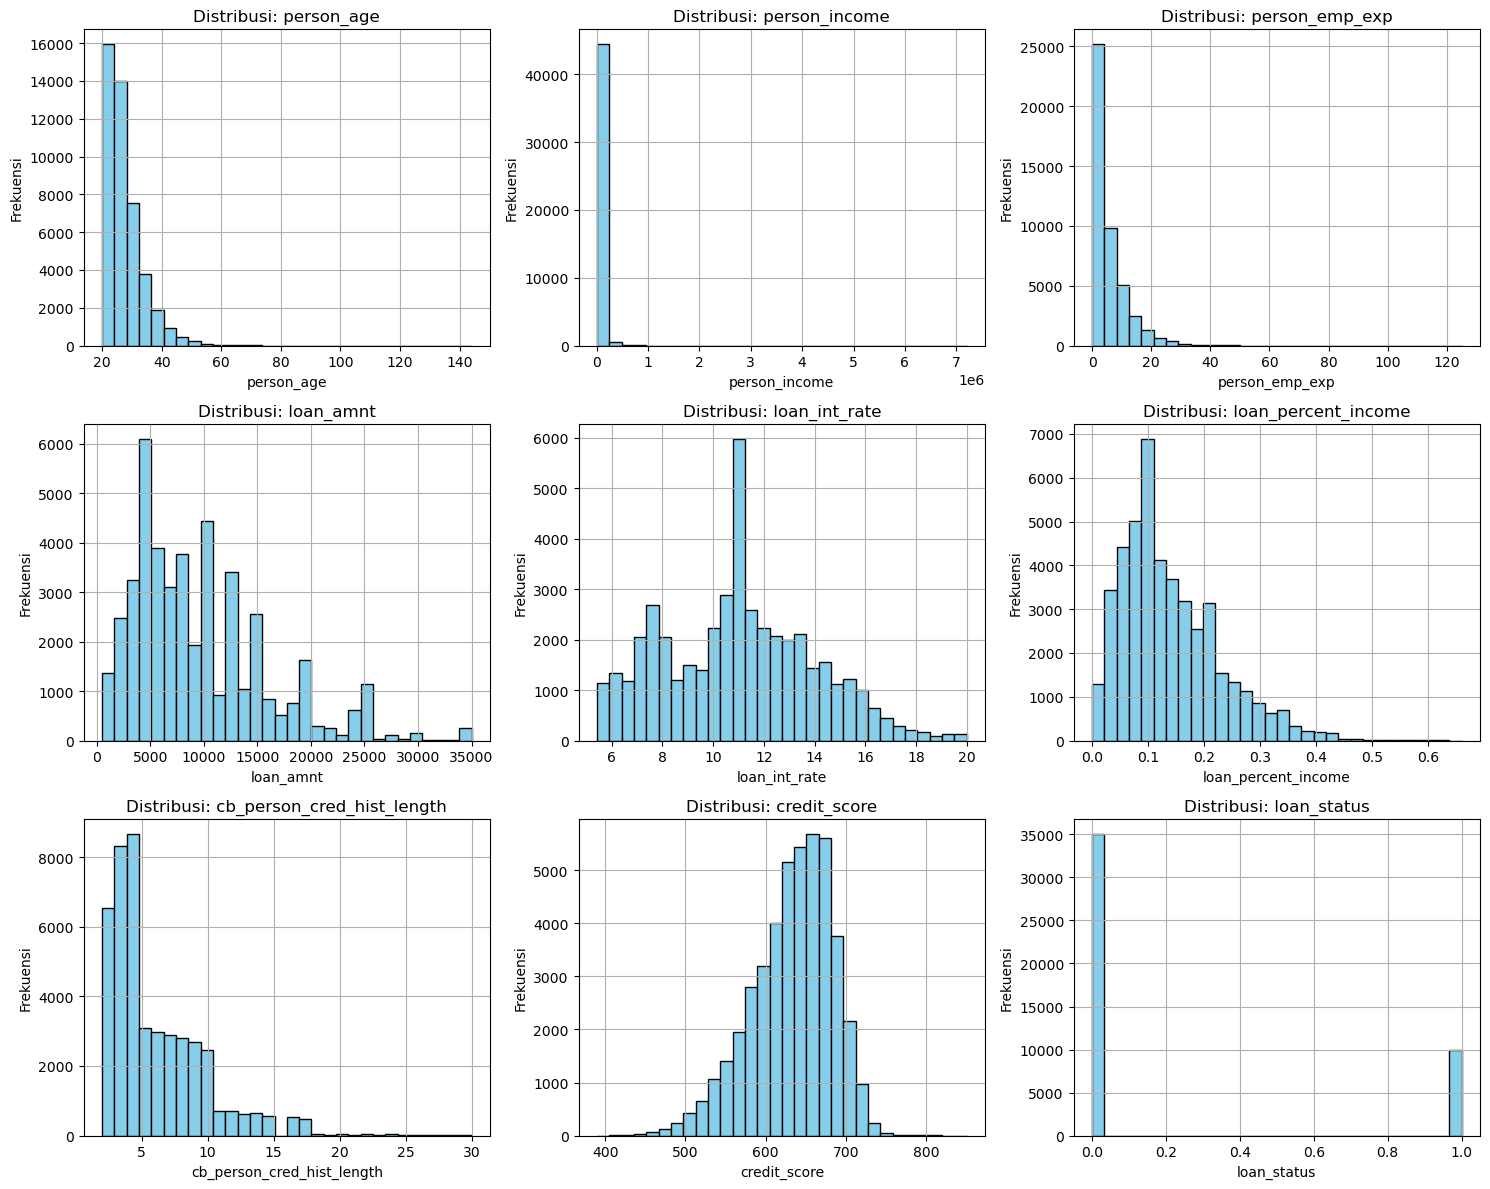

In [54]:
# Buat grid 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Ubah jadi 1 dimensi agar mudah diakses

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribusi: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
    axes[i].grid(True)

# Sembunyikan subplot yang tidak terpakai (jika jumlah kolom < 9)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

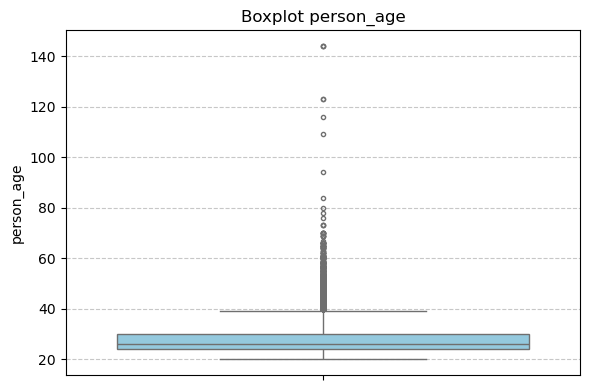

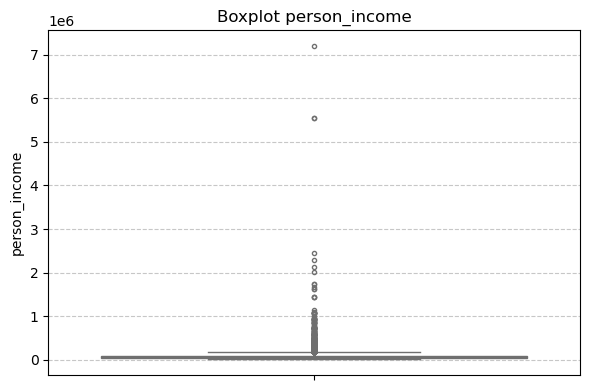

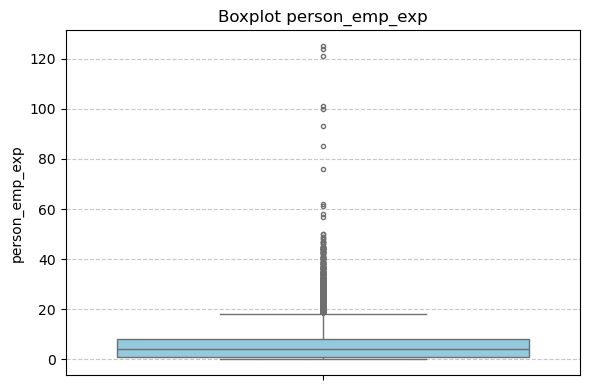

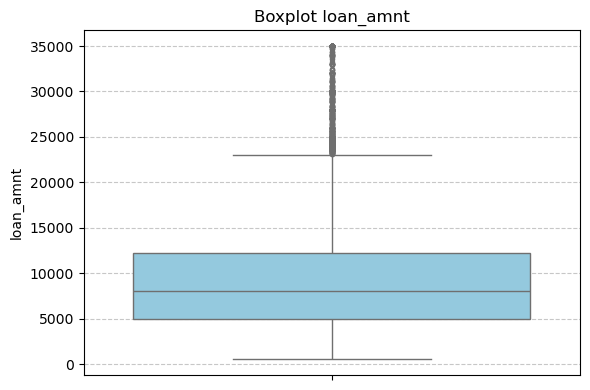

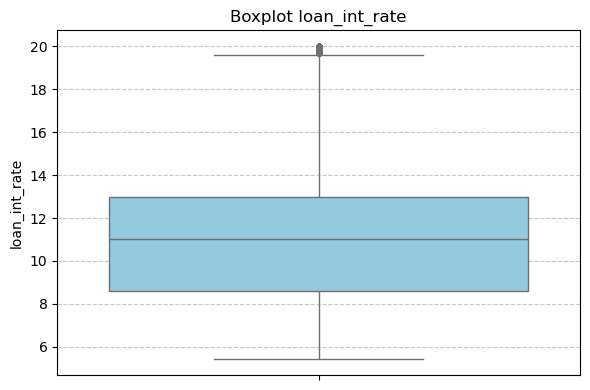

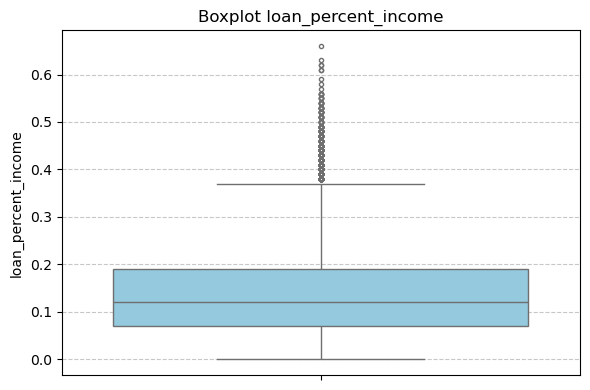

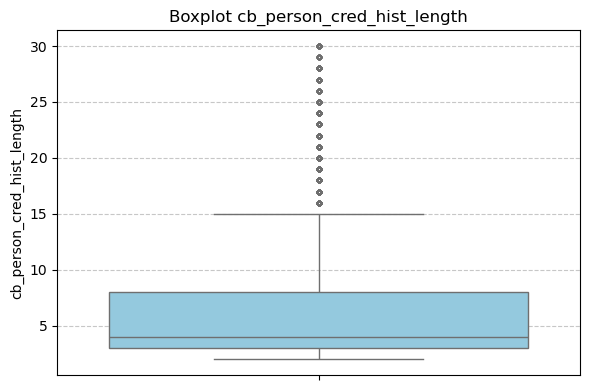

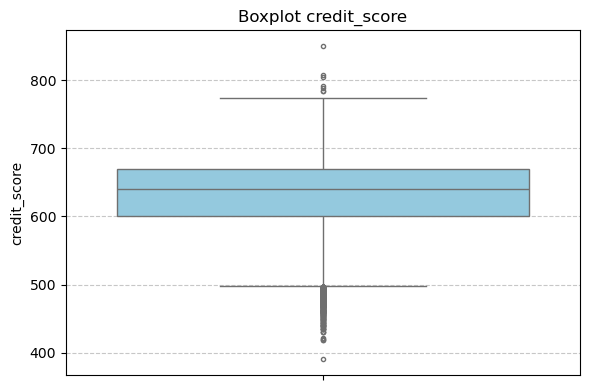

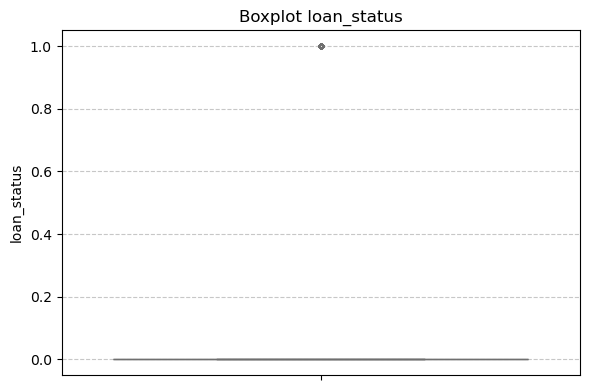

In [55]:
# Tampilkan boxplot satu per satu
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='skyblue', fliersize=3)
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13184\147801143.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=df, x=col, ax=ax, palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13184\147801143.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=df, x=col, ax=ax, palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13184\147801143.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=df, x=col, ax=ax, palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13184\147801143.py:

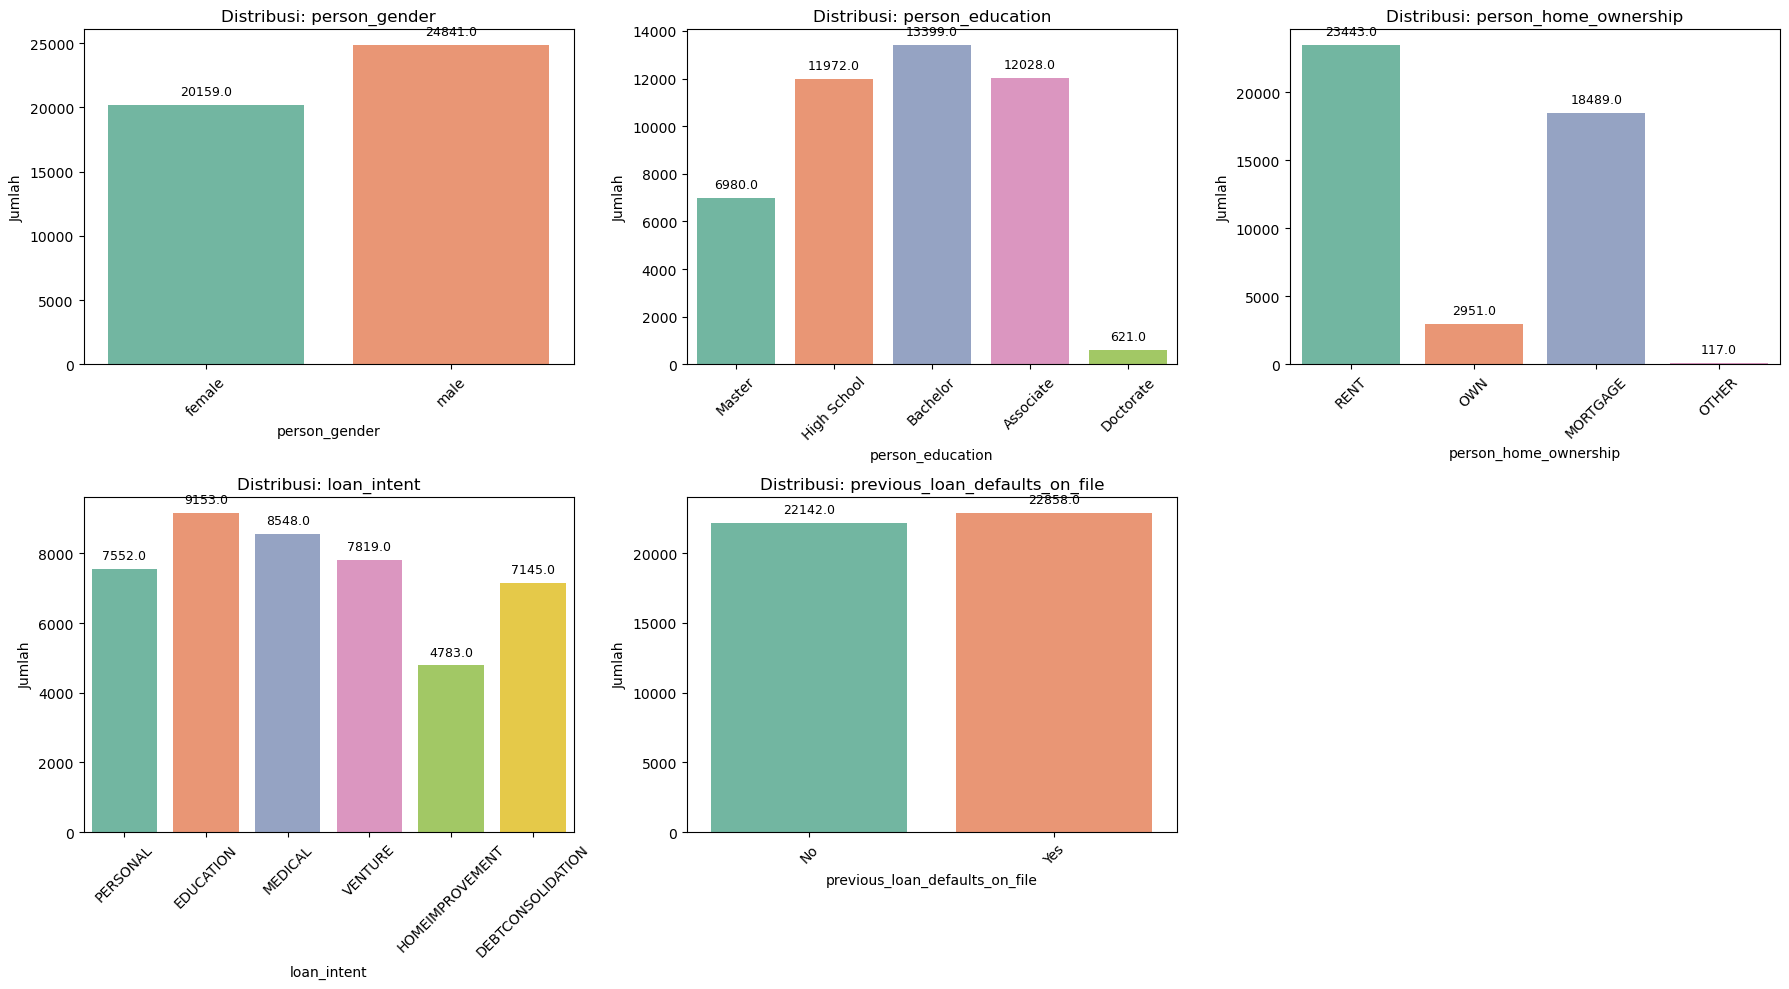

In [56]:
# Buat grid 2 baris × 3 kolom
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categoric_cols):
    ax = axes[i]
    plot = sns.countplot(data=df, x=col, ax=ax, palette='Set2')
    ax.set_title(f'Distribusi: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Jumlah')
    ax.tick_params(axis='x', rotation=45)
    
    # Tambahkan label angka di atas bar
    for p in plot.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 5),  # offset label di atas bar
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

# Sembunyikan plot kosong jika jumlah kolom < jumlah subplot
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

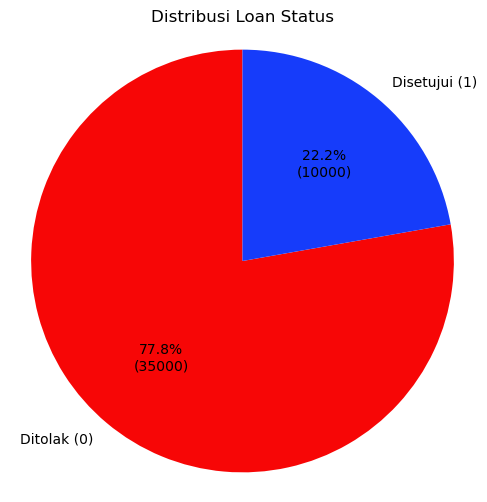

In [57]:
# Hitung frekuensi dari masing-masing nilai loan_status dan urutkan index
status_counts = df['loan_status'].value_counts().sort_index()  # 0 dulu baru 1

# Label sesuai urutan index
labels = ['Ditolak (0)', 'Disetujui (1)']

# Fungsi untuk menampilkan persentase dan jumlah absolut
def autopct_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    status_counts, 
    labels=labels, 
    autopct=lambda pct: autopct_format(pct, status_counts), 
    startangle=90, 
    colors=["#F70606", "#163CFA"]  # Merah untuk ditolak, biru untuk disetujui
)
plt.title('Distribusi Loan Status')
plt.axis('equal')
plt.show()

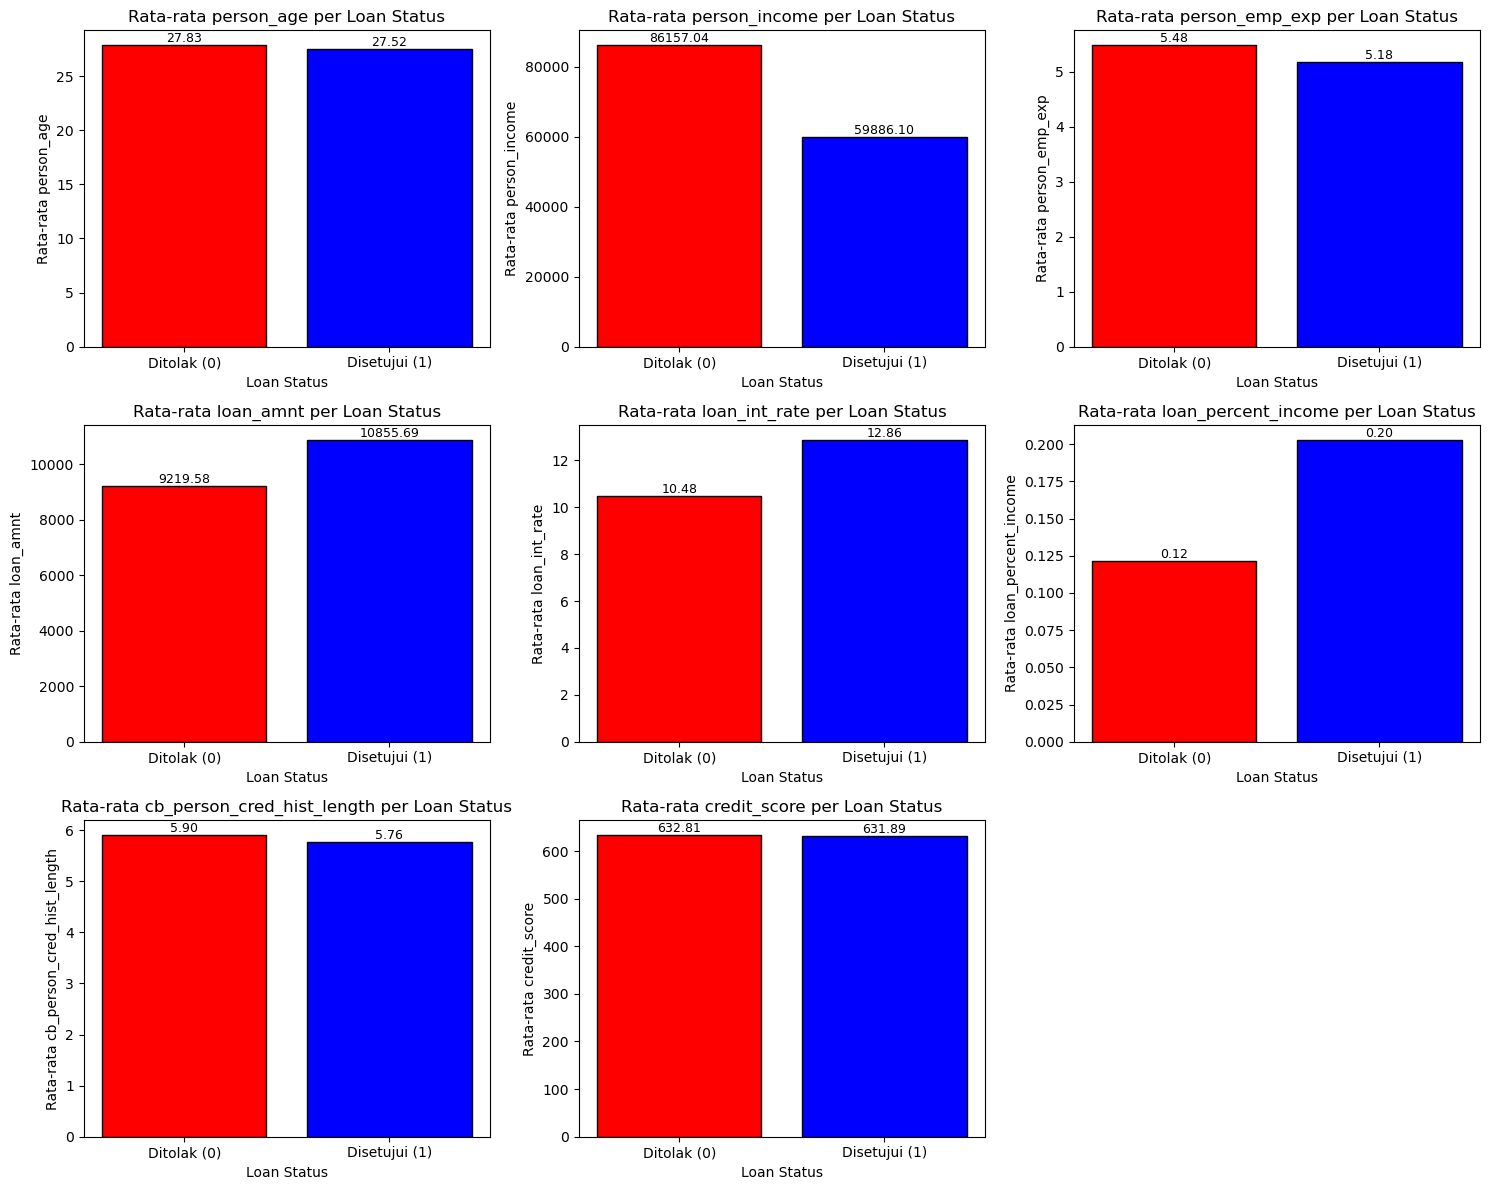

In [58]:
# Pilih semua kolom numerik selain 'loan_status'
numeric_cols = df.select_dtypes(include='number').columns.drop('loan_status')

# Ukuran grid plot
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop setiap kolom numerik
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Hitung rata-rata nilai kolom berdasarkan loan_status
    mean_values = df.groupby('loan_status')[col].mean()
    
    # Tentukan warna berdasarkan loan_status index
    colors = ['red' if status == 0 else 'blue' for status in mean_values.index]
    
    # Plot bar chart dengan matplotlib langsung agar lebih fleksibel
    bars = plt.bar(mean_values.index, mean_values.values, color=colors, edgecolor='black')
    
    # Tambahkan label angka di atas bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', 
                 ha='center', va='bottom', fontsize=9)
    
    plt.title(f'Rata-rata {col} per Loan Status')
    plt.ylabel(f'Rata-rata {col}')
    plt.xlabel('Loan Status')
    plt.xticks([0, 1], ['Ditolak (0)', 'Disetujui (1)'], rotation=0)

plt.tight_layout()
plt.show()

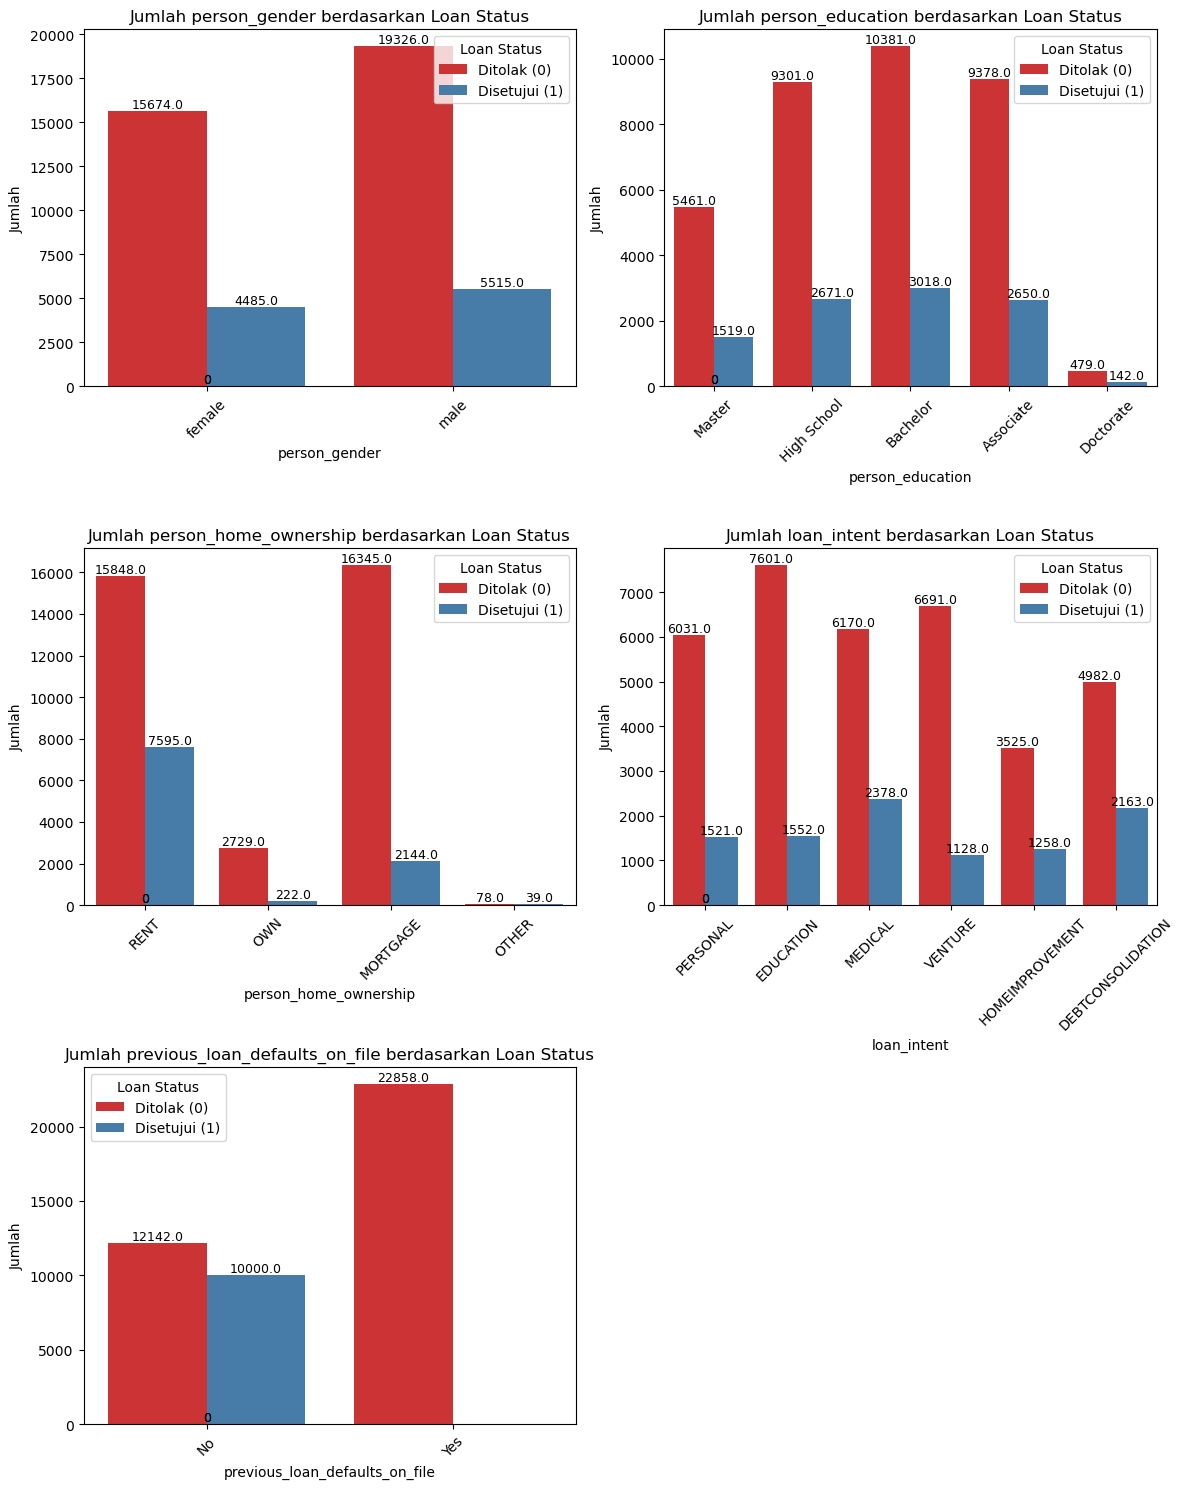

In [59]:
# Pilih kolom kategorik
categoric_cols = df.select_dtypes(include='object').columns

# Ukuran grid plot
n_cols = 2
n_rows = (len(categoric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 6, n_rows * 5))

# Loop setiap kolom kategorik
for i, col in enumerate(categoric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    ax = sns.countplot(data=df, x=col, hue='loan_status', hue_order=[0, 1], palette='Set1')
    
    # Tambahkan angka di atas bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

    plt.title(f'Jumlah {col} berdasarkan Loan Status')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.legend(title='Loan Status', labels=['Ditolak (0)', 'Disetujui (1)'])

plt.tight_layout()
plt.show()


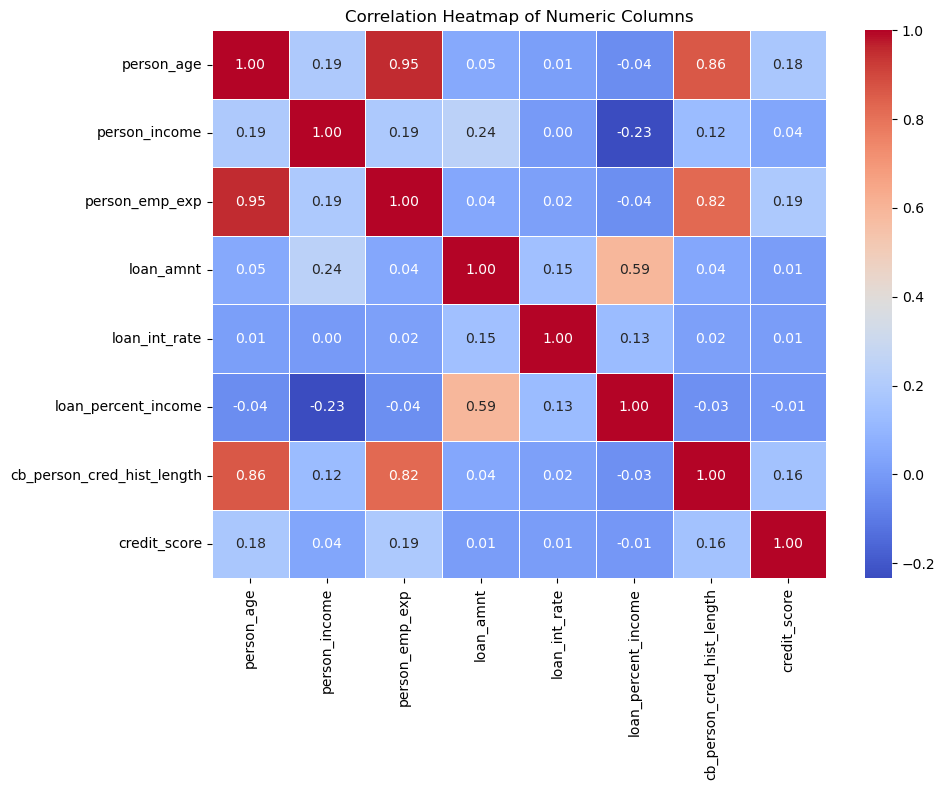

In [60]:
# Membuat korelasi antar kolom numerik
corr_matrix = df[numeric_cols].corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

#### 1. Menghapus atau Menangani Data Kosong

In [ ]:
# Missing value
df = df.dropna()

#### 2. Menghapus Data Duplikat

In [ ]:
# Drop Data Duplikat
df = df.drop_duplicates()

#### 3. Data Scaling (Standarisasi)

In [13]:
# Data Splitting (Scaling hanya dilakukan pada data train saja sehingga diperlukan splitting data terlebih dahulu)
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split data: 80% train, 20% test (bisa ubah sesuai kebutuhan)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% data uji
    random_state=42,     # untuk reproduktibilitas
    stratify=y           # menjaga proporsi kelas
)

# Tampilkan bentuk data hasil split
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (36000, 13)
X_test : (9000, 13)
y_train: (36000,)
y_test : (9000,)


In [20]:
# Tipe Tipe Data dalam dataset X 
# numerik columns
numeric_cols = X[['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score']]

# Kolom nominal (One Hot Encoding)
nominal_cols = X[['person_education', 'person_home_ownership',
       'loan_intent']]

# Kolom biner (LabelEncoder)
biner_cols = X[['person_gender', 'previous_loan_defaults_on_file']]

print(numeric_cols)
print(nominal_cols)
print(biner_cols)

       person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0            22.0        71948.0               0    35000.0          16.02   
1            21.0        12282.0               0     1000.0          11.14   
2            25.0        12438.0               3     5500.0          12.87   
3            23.0        79753.0               0    35000.0          15.23   
4            24.0        66135.0               1    35000.0          14.27   
...           ...            ...             ...        ...            ...   
44995        27.0        47971.0               6    15000.0          15.66   
44996        37.0        65800.0              17     9000.0          14.07   
44997        33.0        56942.0               7     2771.0          10.02   
44998        29.0        33164.0               4    12000.0          13.23   
44999        24.0        51609.0               1     6665.0          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Tentukan kolom
numeric_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
                'credit_score']
nominal_cols = ['person_education', 'person_home_ownership', 'loan_intent']
biner_cols = ['person_gender', 'previous_loan_defaults_on_file']

# Filter kolom yang ada
all_cols = X_train.columns.tolist()
numeric_cols = [col for col in numeric_cols if col in all_cols]
nominal_cols = [col for col in nominal_cols if col in all_cols]
biner_cols = [col for col in biner_cols if col in all_cols]

# Label encoding kolom biner di train dan test
for col in biner_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # gunakan transform saja di test

# Buat pipeline transformasi
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
nominal_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('nom', nominal_transformer, nominal_cols)
    ],
    remainder='passthrough'  # kolom biner tetap
)

# Fit hanya pada data train
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)  # hanya transform, tidak fit

# Ambil nama fitur
ohe_features = preprocessor.named_transformers_['nom']['onehot'].get_feature_names_out(nominal_cols)
final_columns = numeric_cols + list(ohe_features) + biner_cols

# Kembalikan sebagai DataFrame
X_train_processed = pd.DataFrame(X_train_processed, columns=final_columns)
X_test_processed = pd.DataFrame(X_test_processed, columns=final_columns)


In [28]:
# Simpan Data
X_train_processed.to_csv('X_train_processed.csv', index=False)
X_test_processed.to_csv('X_test_processed.csv', index=False)